## Fashion MNIST 
-------------
-----------

Build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.

Label    Description
- 0        T-shirt/top
- 1        Trouser
- 2        Pullover
- 3        Dress
- 4        Coat
- 5        Sandal
- 6        Shirt
- 7        Sneaker
- 8        Bag
- 9        Ankle boot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
# import datasets fashion mnist
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

## Visual images

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

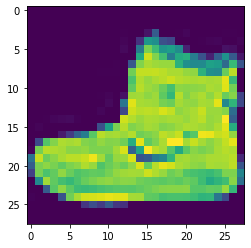

In [6]:
plt.imshow(x_train[0]);

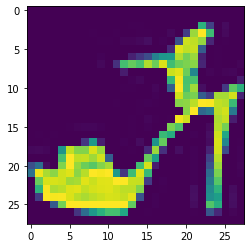

In [7]:
plt.imshow(x_train[9]);

## Preprocessing data y | label | hot end coder

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
# mancari nilai classes
y_classes = to_categorical(y_train)

In [12]:
y_classes.shape

(60000, 10)

In [13]:
y_classes.shape[1]

10

In [14]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

## Normalization data x 

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train[0].max()

255

In [17]:
x_train[0].min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

## Reshape data x

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [23]:
x_test = x_test.reshape(10000, 28, 28,1)

In [24]:
x_train.shape

(60000, 28, 28, 1)

In [25]:
x_test.shape

(10000, 28, 28, 1)

----
## Craete model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten 

In [27]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =128, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

## Add EarlyStopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

------
## Fitting Model

In [ ]:
model.fit(x_train, y_cat_train, 
          epochs =15, 
          validation_data=(x_test, y_cat_test), 
          callbacks =[early_stop])

Epoch 1/15
1875/1875 [==============================] - 206s 109ms/step - loss: 0.4190 - accuracy: 0.8481 - val_loss: 0.3293 - val_accuracy: 0.8791
Epoch 2/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2768 - accuracy: 0.8971

## Evaluation

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

In [ ]:
plt.style.use(['science','notebook','grid'])

In [ ]:
losses[['loss','val_loss']].plot();
plt.title('Cross entropy loss');

In [ ]:
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy');

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(x_test, y_cat_test)

## Prediction

In [ ]:
predict = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
predict

## Evaluation metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predict))

In [ ]:
confusion_matrix(y_test, predict)

In [ ]:
plt.figure(figsize=(12 ,6), dpi=100)
sns.heatmap(confusion_matrix(y_test, predict), annot=True, lw=2);

## Predict images

In [ ]:
my_fashion = x_test[7]

In [ ]:
plt.imshow(my_fashion);

In [ ]:
prediction = np.argmax(model.predict(my_fashion.reshape(1,28, 28, 1)), axis=-1)

In [ ]:
prediction

## Save Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('fashion_mnist.h5')